In [1]:
import pandas as pd
import numpy as np
import string
from sklearn.feature_extraction.text import CountVectorizer # pour construire le vocabualaire de la dataframe
import nltk # pour le traitement sur le text
from nltk.tokenize import word_tokenize # diviser les données en mots
from nltk.corpus import stopwords # eliminer "and, or ..." 
import matplotlib.pyplot as plt # pour la représentation graphique
from tqdm import tqdm 
from nltk.stem import WordNetLemmatizer
from ast import literal_eval
pd.options.mode.chained_assignment = None  # default='warn'
from collections import defaultdict

In [6]:
data = pd.read_excel("Data_CS.xlsx")
CopyData = data.copy()
CopyData

,Y1,Y2,Y,Domain,area,keywords,Abstract
0,0,12,12,CS,Symbolic computation,(2+1)-dimensional non-linear optical waves; e...,(2 + 1)-dimensional non-linear optical waves t...
1,0,0,0,CS,Computer vision,Tea category identification; computer vision;...,(Objective) In order to increase classificatio...
2,0,5,5,CS,Computer graphics,3D images; Virtual reality; Smoothness,[Purpose] This study verified that the smoothn...
3,0,4,4,CS,Operating systems,biodiversity surveys; camera trapping; data m...,1. Camera trapping is a widely applied method ...
4,0,1,1,CS,Machine learning,distribution; endangered species; groundwater...,1. Species distribution modelling can be usefu...
...,...,...,...,...,...,...,...
6509,0,3,3,CS,Cryptography,Zero-difference balanced (ZDB) function; gene...,Zero-difference balanced (ZDB) functions have ...
6510,0,15,15,CS,Data structures,Data structures for logic synthesis; error re...,Zero-Suppressed Binary Decision Diagrams (ZDDs...
6511,0,15,15,CS,Data structures,Linear programming; Zinc; Solver independence...,Zinc is a modeling language in which a concept...
6512,0,15,15,CS,Data structures,Z-Wave; Wireless; Embedded systems; Internet ...,Z-Wave is an implementation of home automation...


In [7]:
CopyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6514 entries, 0 to 6513
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Y1        6514 non-null   int64 
 1   Y2        6514 non-null   int64 
 2   Y         6514 non-null   int64 
 3   Domain    6514 non-null   object
 4   area      6514 non-null   object
 5   keywords  6514 non-null   object
 6   Abstract  6514 non-null   object
dtypes: int64(3), object(4)
memory usage: 356.4+ KB


In [11]:
df = CopyData.drop('Y1', axis = 1)

In [15]:
df = df.drop('Y1', axis = 1)

In [16]:
df

,Y,Domain,area,keywords,Abstract
0,12,CS,Symbolic computation,(2+1)-dimensional non-linear optical waves; e...,(2 + 1)-dimensional non-linear optical waves t...
1,0,CS,Computer vision,Tea category identification; computer vision;...,(Objective) In order to increase classificatio...
2,5,CS,Computer graphics,3D images; Virtual reality; Smoothness,[Purpose] This study verified that the smoothn...
3,4,CS,Operating systems,biodiversity surveys; camera trapping; data m...,1. Camera trapping is a widely applied method ...
4,1,CS,Machine learning,distribution; endangered species; groundwater...,1. Species distribution modelling can be usefu...
...,...,...,...,...,...
6509,3,CS,Cryptography,Zero-difference balanced (ZDB) function; gene...,Zero-difference balanced (ZDB) functions have ...
6510,15,CS,Data structures,Data structures for logic synthesis; error re...,Zero-Suppressed Binary Decision Diagrams (ZDDs...
6511,15,CS,Data structures,Linear programming; Zinc; Solver independence...,Zinc is a modeling language in which a concept...
6512,15,CS,Data structures,Z-Wave; Wireless; Embedded systems; Internet ...,Z-Wave is an implementation of home automation...


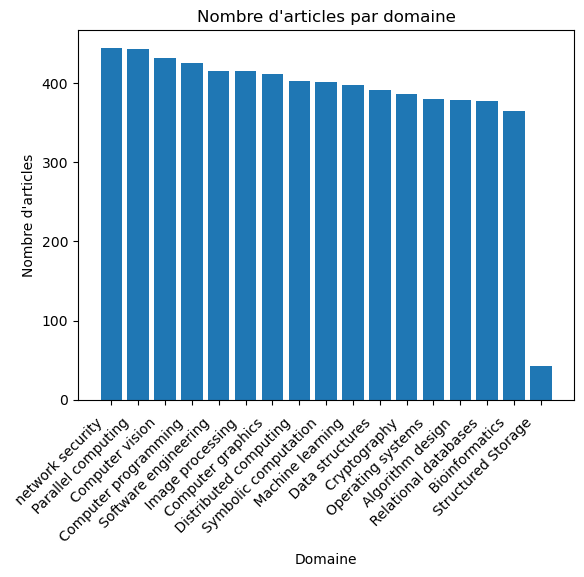

In [25]:
DF = pd.DataFrame(df)

article_par_domaine = df['area'].value_counts()

plt.bar(article_par_domaine.index, article_par_domaine)

plt.title('Nombre d\'articles par domaine')
plt.xlabel('Domaine')
plt.ylabel('Nombre d\'articles')

plt.xticks(rotation=45, ha='right')

plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6514 entries, 0 to 6513
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Y         6514 non-null   int64 
 1   Domain    6514 non-null   object
 2   area      6514 non-null   object
 3   keywords  6514 non-null   object
 4   Abstract  6514 non-null   object
dtypes: int64(1), object(4)
memory usage: 254.6+ KB


<BarContainer object of 3 artists>

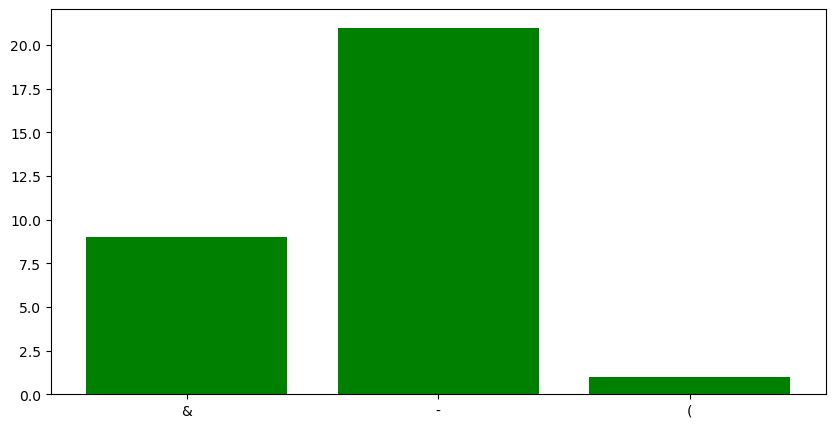

In [29]:
plt.figure(figsize=(10,5))
dic=defaultdict(int)
special = string.punctuation
for i in range(6514):
    corpus=df["keywords"][i].split()
    for word in corpus:
        if word in special:
            dic[word] += 1
x,y=zip(*dic.items())
plt.bar(x,y,color='green')

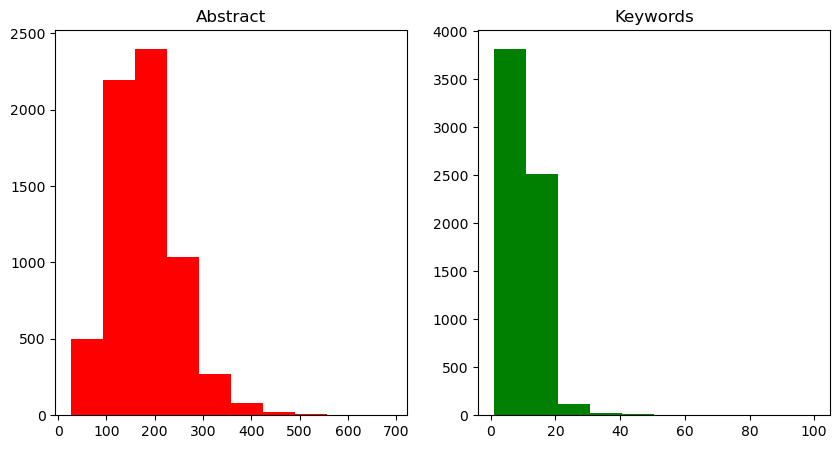

In [32]:
#nombre de mots dans 'Abstract' et 'keyword'
fig,(ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
word_len = df["Abstract"].str.split().map(lambda x: len(x))
ax1.hist(word_len, color = 'red')
ax1.set_title('Abstract')

word_len = df["keywords"].str.split().map(lambda x: len(x))
ax2.hist(word_len, color = 'green')
ax2.set_title('Keywords')

plt.show()

In [35]:
#conversion de tout les caractères en minuscules
df['Cleaned_keywords'] = df['keywords'].str.lower()
df['Cleaned_abstract'] = df['Abstract'].str.lower()

In [36]:
#Eliminer les urls
df['keywords'] = df['Cleaned_keywords'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df['abstract'] = df['Cleaned_abstract'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

In [39]:
#Eliminer les ponctuation
def remove_punctuation_numbers(data):
    data_pun = data.translate(str.maketrans(string.punctuation,' '*len(string.punctuation))).replace(' '*4,' ').replace(' '*3,' ').replace(' '*2,' ')
    new_data = data_pun.translate(str.maketrans(string.digits,' '*len(string.digits))).replace(' '*4,' ').replace(' '*3,' ').replace(' '*2,' ')
    return new_data

for i in range(6514):
    df["Cleaned_abstract"][i]=remove_punctuation_numbers(df["Cleaned_abstract"][i])
    df["Cleaned_keywords"][i]=remove_punctuation_numbers(df["Cleaned_keywords"][i])

In [42]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kaout\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [43]:
#import NLTK 
#La fonction"word_tokenize" est disponible dans la bibliothèque NLTK
for i in range(6514):
    df["Cleaned_abstract"][i]=word_tokenize(df["Cleaned_abstract"][i])
    df["Cleaned_keywords"][i]=word_tokenize(df["Cleaned_keywords"][i])

In [45]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kaout\AppData\Roaming\nltk_data...


True

In [47]:
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kaout\AppData\Roaming\nltk_data...


True

In [48]:
#Lemmantisation 'abstract'

lemmatizer = WordNetLemmatizer()
for i in tqdm(range(6514)):
    df["Cleaned_abstract"][i] =[lemmatizer.lemmatize(word,pos='v') for word in df["Cleaned_abstract"][i]]

100%|██████████| 6514/6514 [00:09<00:00, 698.01it/s] 


In [49]:
#Lemmantisation 'keywords'

lemmatizer = WordNetLemmatizer()
for i in tqdm(range(6514)):
    df["Cleaned_keywords"][i] =[lemmatizer.lemmatize(word,pos='v') for word in df["Cleaned_keywords"][i]]

100%|██████████| 6514/6514 [00:02<00:00, 2371.92it/s]


In [52]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kaout\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [58]:
from tqdm import tqdm
from nltk.corpus import stopwords

# Charger les stopwords une fois à l'extérieur de la boucle
stop_words = set(stopwords.words("english"))  # Remplacez "your_language" par la langue appropriée, par exemple, "english"

# Éliminer les mots vides
for i in tqdm(range(6514)):
    df["Cleaned_abstract"][i] = [word for word in df["Cleaned_abstract"][i] if word not in stop_words]
    df["Cleaned_keywords"][i] = [word for word in df["Cleaned_keywords"][i] if word not in stop_words]


100%|██████████| 6514/6514 [00:04<00:00, 1472.03it/s]


In [59]:
df.to_excel("Data_Hackathon.xlsx")

In [60]:
data_hackathon = df.copy()

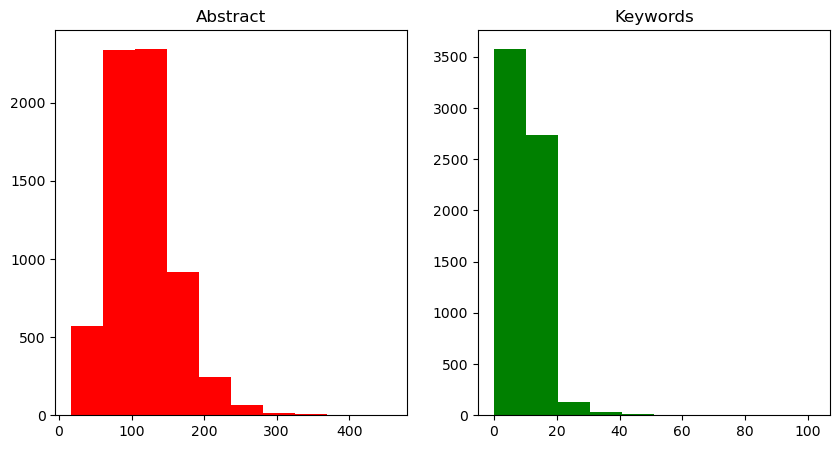

In [63]:
import matplotlib.pyplot as plt

# Assurez-vous que les colonnes sont de type liste
df["Cleaned_abstract"] = df["Cleaned_abstract"].apply(lambda x: x if isinstance(x, list) else [])
df["Cleaned_keywords"] = df["Cleaned_keywords"].apply(lambda x: x if isinstance(x, list) else [])

# Nombre de mots dans 'Abstract' et 'Keywords'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

word_len_abstract = df["Cleaned_abstract"].apply(len)
ax1.hist(word_len_abstract, color='red')
ax1.set_title('Abstract')

word_len_keywords = df["Cleaned_keywords"].apply(len)
ax2.hist(word_len_keywords, color='green')
ax2.set_title('Keywords')

plt.show()
